* Objectif :    
    - Prédire si une personne est infectée en fonction des données cliniques disponibles
* Métrique adaptée choisie ? (ex : F1, Recall...)
    - F1 min 50% et recall min 70%

In [103]:
# Imports standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: model selection
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
    validation_curve,
)

# Scikit-learn: preprocessing
from sklearn.preprocessing import (
    Binarizer,
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
)

# Scikit-learn: pipeline & composition
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer

# Scikit-learn: imputation
from sklearn.impute import SimpleImputer

# Scikit-learn: feature selection
from sklearn.feature_selection import (
    RFECV,
    RFE,
    SelectFromModel,
    SelectKBest,
    VarianceThreshold,
    chi2,
)

# Scikit-learn: models
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    IsolationForest,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
)

# Scikit-learn: decomposition
from sklearn.decomposition import PCA

# Scikit-learn: metrics
from sklearn.metrics import (
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
) 
pd.set_option('display.max_rows', 20)     # Set max number of rows shown
pd.set_option('display.max_columns', None)  # Set max number of columns shown
pd.set_option('display.width', 1000)       # Set max width of the display
pd.set_option('display.max_colwidth', None)

## EDA

### Form Analysis (EDA)

* [X]Ai-je identifié la variable cible (target) ?
    - target = data["SARS-Cov-2 exam result	"]

In [104]:
#Importe le dataset covid 19 et affichage des données du dataset
df = pd.read_csv("../data/covid-19.csv", encoding="latin1")
display(df) #Target = SARS-Cov-2 exam result


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

* [X]Ai-je noté le nombre de lignes et colonnes du dataset ?
    - (5644, 111)

In [105]:
df.shape

(5644, 111)

* [X] Les types de variables sont-ils bien identifiés (numériques, catégorielles...) ? (sns.pie and dtype with value_counts)
    - float64: 70, object: 37, int64: 4

**Tips**:
- (sns.pie and dtype with value_counts)

float64    70
object     37
int64       4
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x21c562dfd40>,
 [Text(-0.43886182859316464, 1.0086626271473846, 'float64'),
  Text(0.32210496057508803, -1.0517834351105368, 'object'),
  Text(1.0929583742237192, -0.12426581273320798, 'int64')],
 [Text(-0.23937917923263524, 0.5501796148076643, '63.1%'),
  Text(0.17569361485913892, -0.5737000555148383, '33.3%'),
  Text(0.5961591132129377, -0.06778135239993162, '3.6%')])

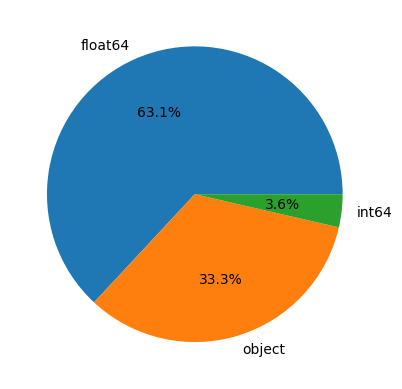

In [106]:
#Displays the types of variables in the dataset
print(df.dtypes.value_counts())
plt.pie(df.dtypes.value_counts(), labels=df.dtypes.value_counts().index, autopct='%1.1f%%')

* [X]Ai-je repéré les valeurs manquantes ? 
    - When there are lines in the heatmap, there are relations in the variables
    - 72 columns with missing value percentage over 90%
    - 2 groups: 76% => viral test, 89% taux sanguins

**Tips**:
   - with isna and sns.heatmap
   - IF yes => delete the columns with a too many of Nan values
   - Displays the percentage of missing values for findind groups in data

Pourcentage total de valeurs manquantes dans le dataset: 0.8806003026414082
Nombre de colonnes avec plus de 90% de valeurs manquantes: 72
Pourcentage de valeurs manquantes par colonne (triées):
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
Partial thromboplastin time (PTT)                        1.0
Prothrombin time (PT), Activity                          1.0
D-Dimer                                                  1.0
                                                        ... 
SARS-Cov-2 exam result                                   0.0
Patient age quantile                                     0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to intensive care unit (1=yes, 0=no)    0.0
Patient ID                                               0.0
Length: 111, dtype: float64


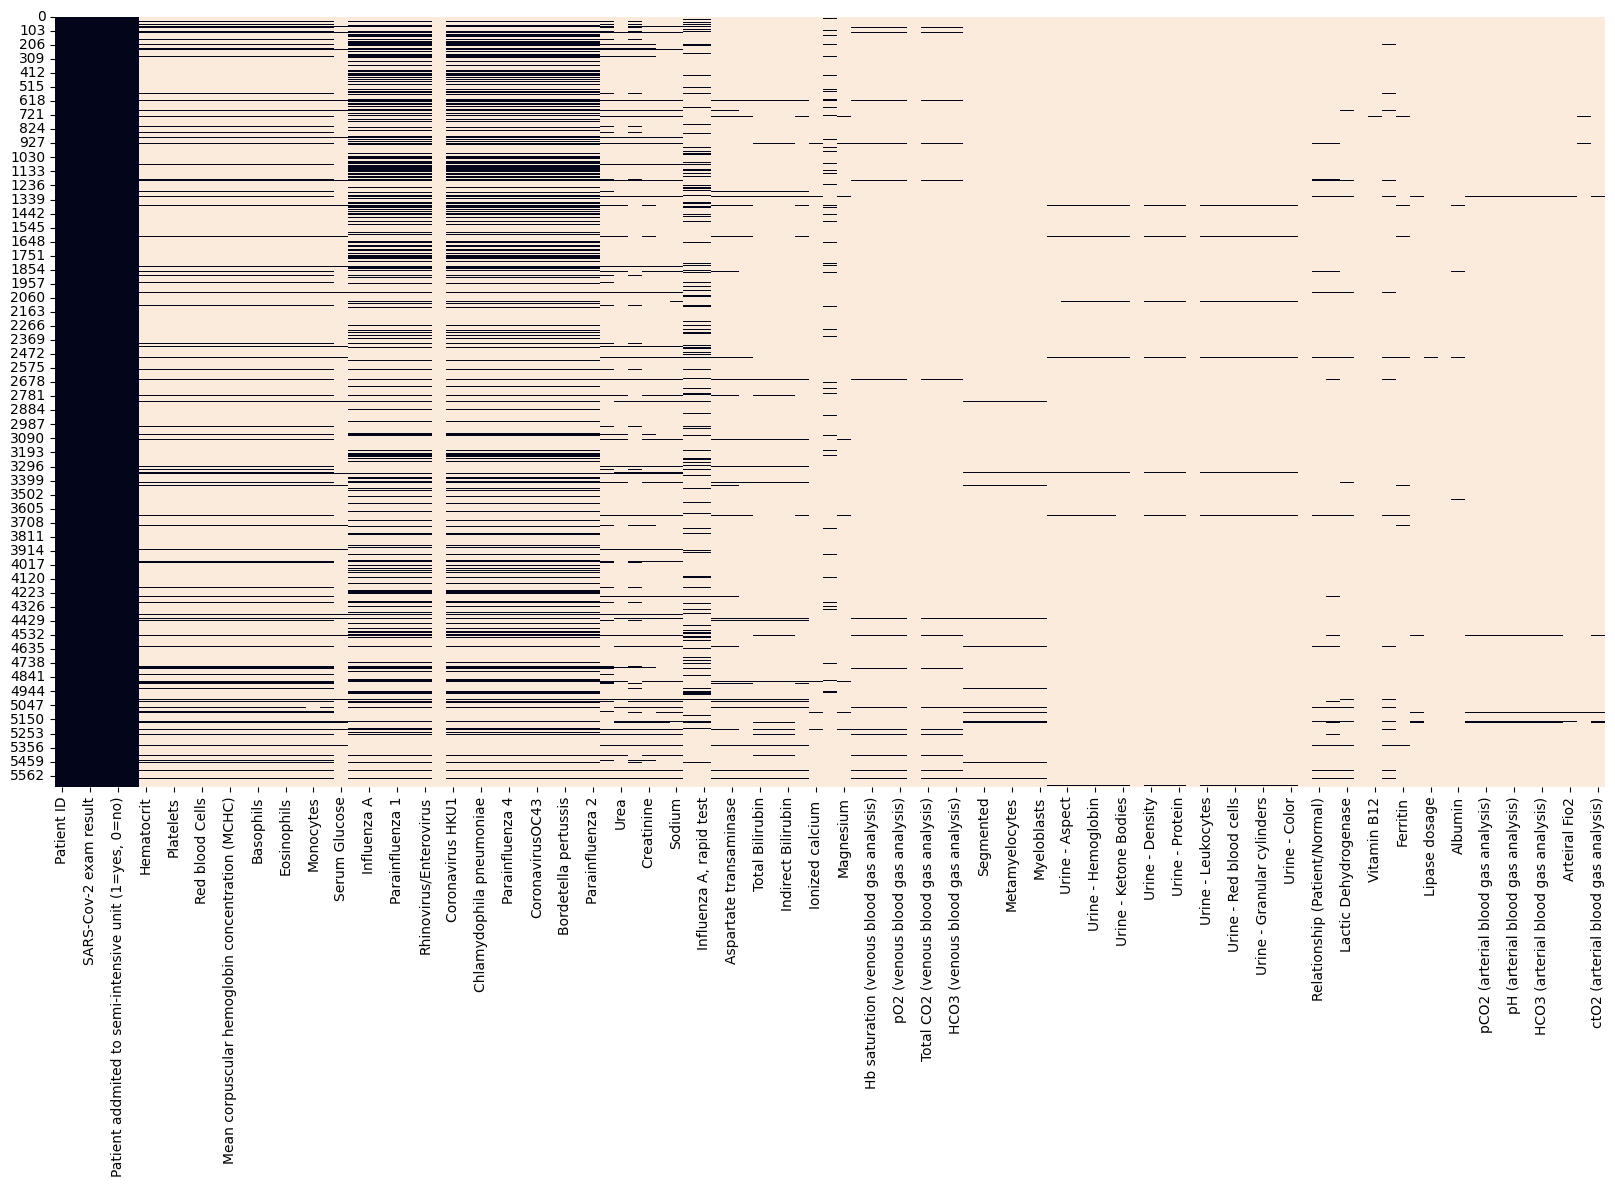

In [107]:
### By myself
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)
print("Pourcentage total de valeurs manquantes dans le dataset:", (df.isna().sum()).sum() / (df.shape[0] * df.shape[1]))
print("Nombre de colonnes avec plus de 90% de valeurs manquantes:", ((df.isna().sum() / df.shape[0]) > 0.90).sum())
print("Pourcentage de valeurs manquantes par colonne (triées):")
missing_percentages = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)
print(missing_percentages)

### Content analysis (EDA)
##### + nettoyage du df



In [108]:
df = df.loc[:, df.isna().sum()/df.shape[0] < 0.90]
df = df.drop("Patient ID", axis=1)  # Drop the "Patien ID" column as it is not useful for analysis

* Ai-je visualisé la distribution de la target (histogramme, boxplot) ?
    - 10% positive test => Classes pas équilibrées => utiliser score F1

**Tips**:
- (sns.pie and dtype with value_counts)

In [109]:
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

* Est-ce que je comprends bien la signification de chaque variable (Histogrammes de valeurs)?
    - Les courbes sont centrées en 0 avec écrat type = 1 => données standardisées
    - distribution normales pour la plupart
    - virale, variable qualitative binaire, rhinovirus qui semble très élevé

**Tips**:
- Utiliser .select_dtypes() pour sélectionner seulement un type de donnée
- Utiliser unique pour obtenir le type de variable(similaire à value_counts)
- Utiliser pie pour visualiser la distribution de chacune des colonnes

Variables quantitatives

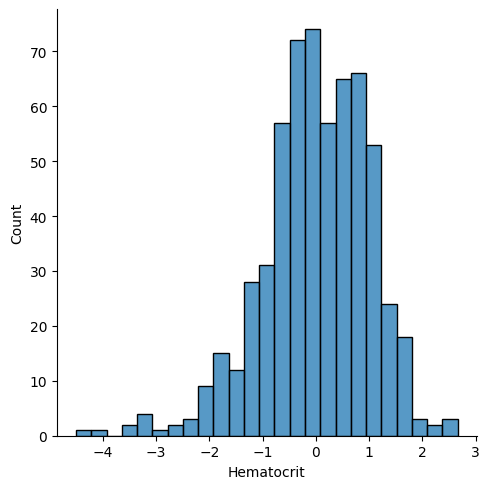

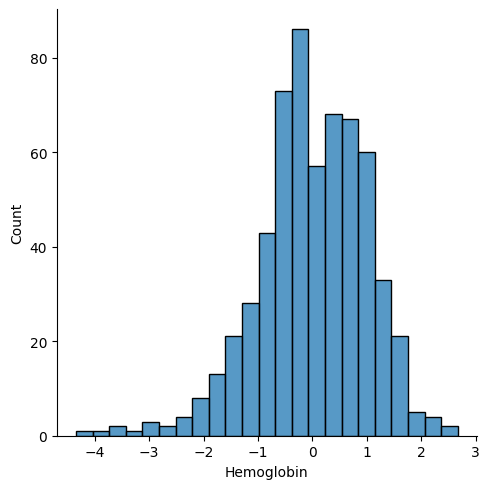

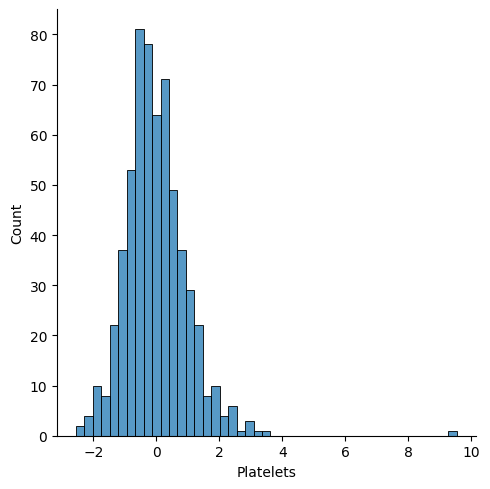

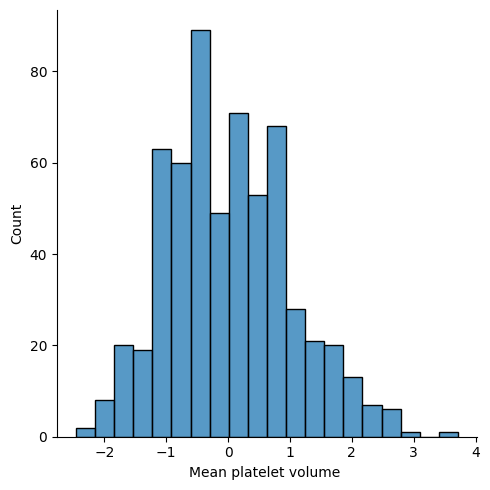

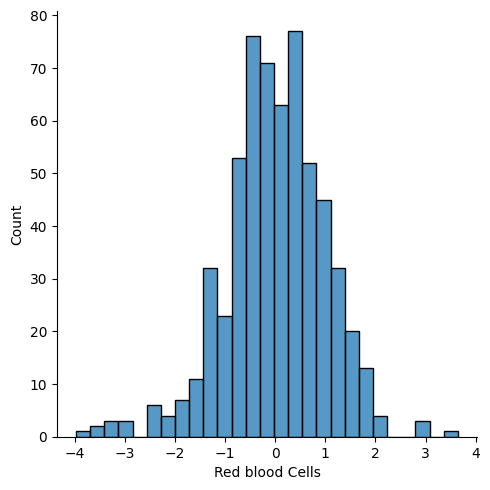

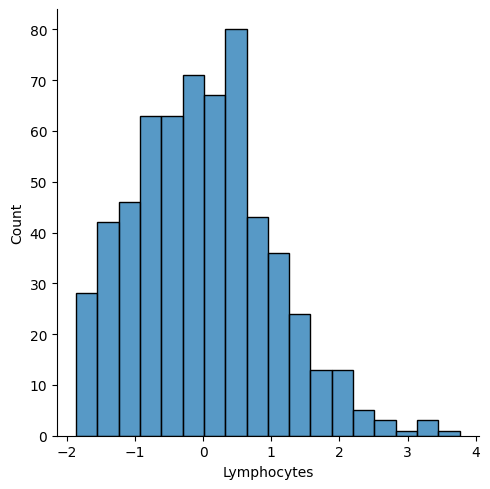

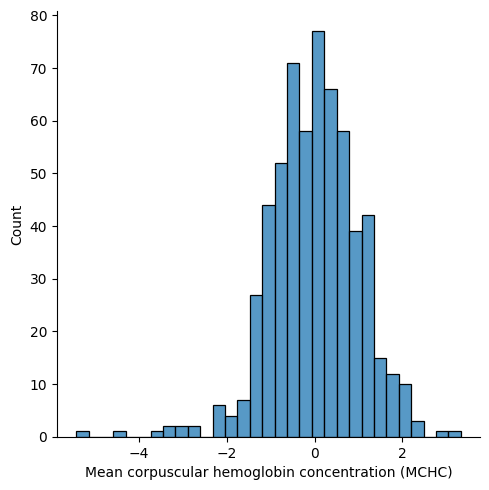

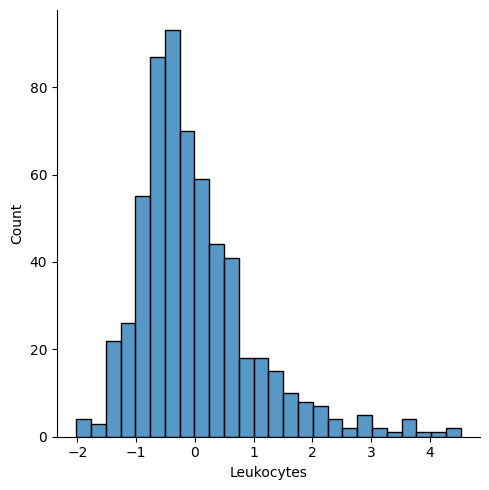

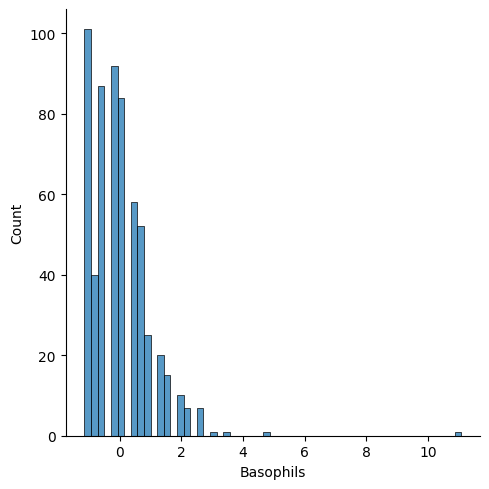

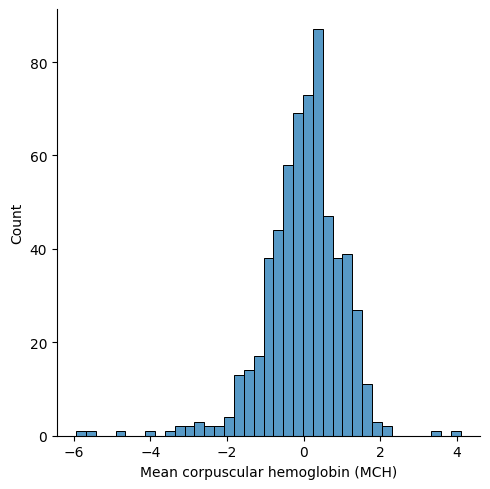

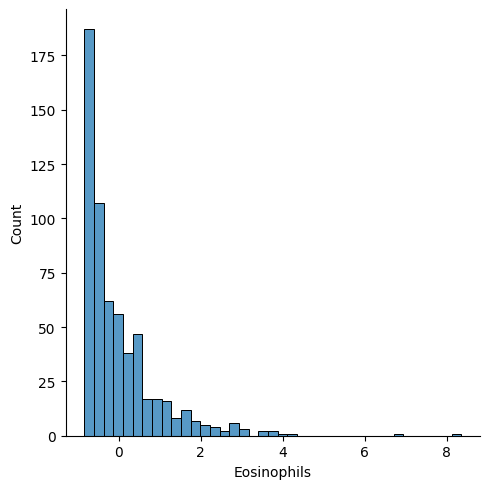

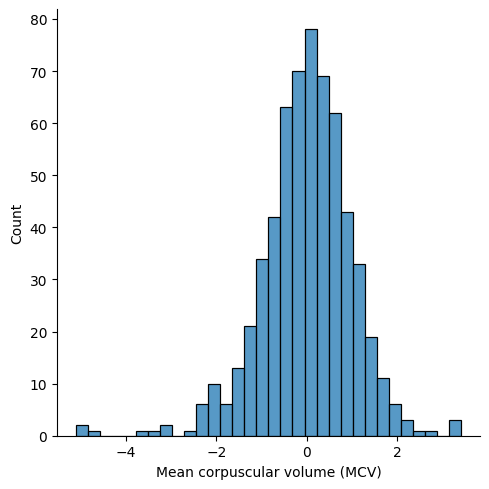

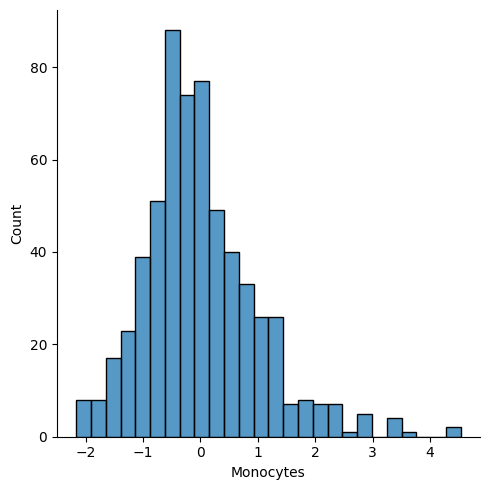

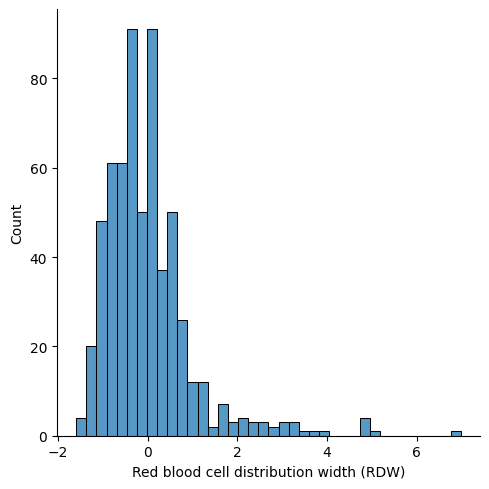

In [110]:

for col in df.select_dtypes("float"): # Loop through all float columns
    sns.displot(df[col])

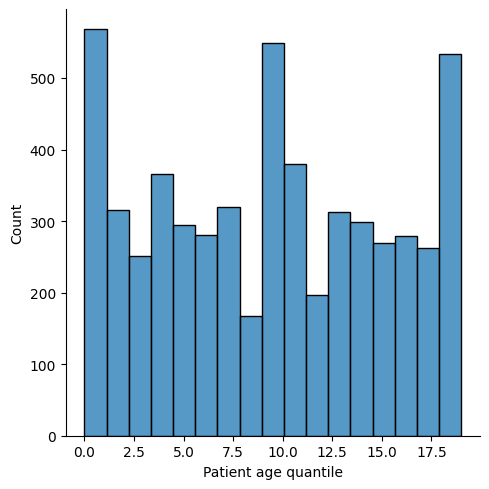

In [111]:
sns.displot(df["Patient age quantile"])

Variables Qualitatives

In [112]:
for col in df.select_dtypes("object"):
    print(f'{col :-<40} {df[col].unique()}')

SARS-Cov-2 exam result------------------ ['negative' 'positive']
Respiratory Syncytial Virus------------- [nan 'not_detected' 'detected']
Influenza A----------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------ [nan 'not_detected' 'detected']
Parainfluenza 3------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae---------------- [nan 'not_detected' 'detected']
Adenovirus------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 4------------------------- [nan 'not_detected' 'detected']
Coronavirus229E------------------------- [nan 'not_detected' 'detected']
CoronavirusOC43------------------------- [nan 'not_detected

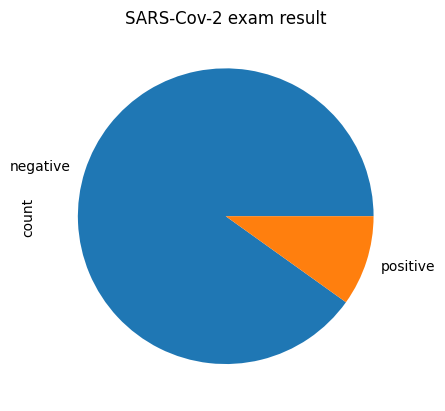

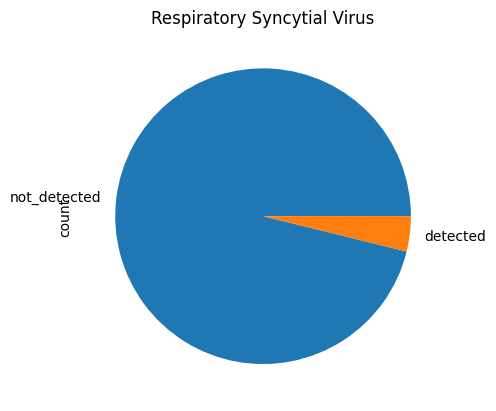

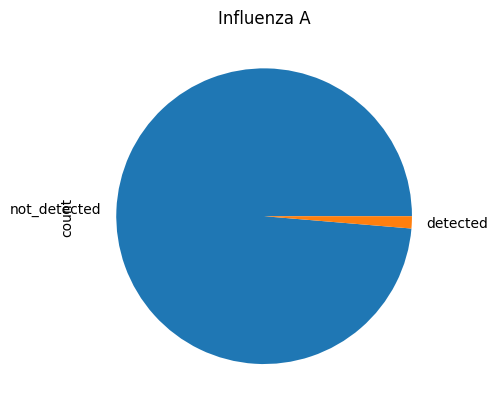

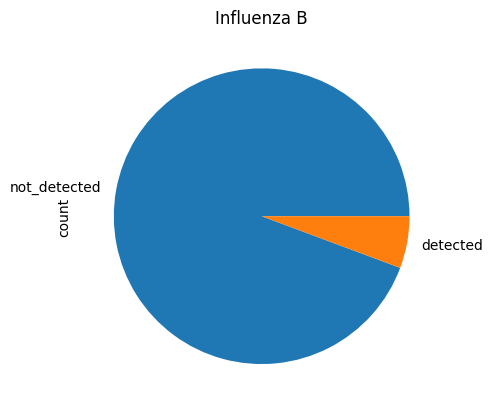

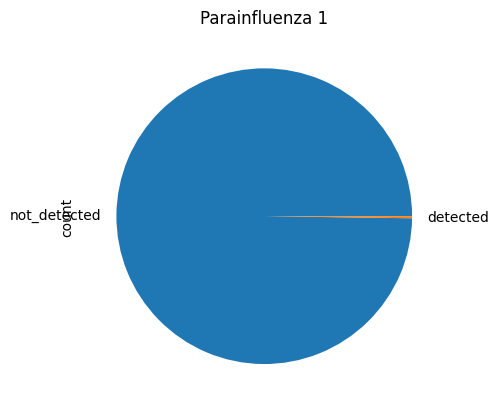

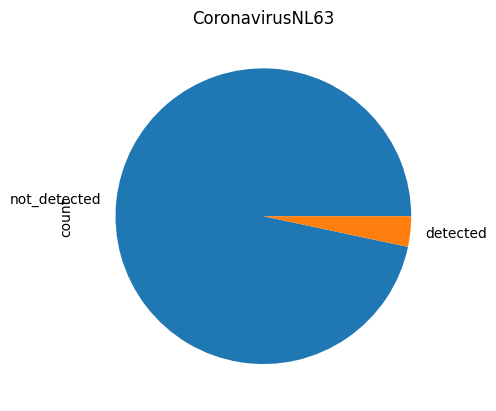

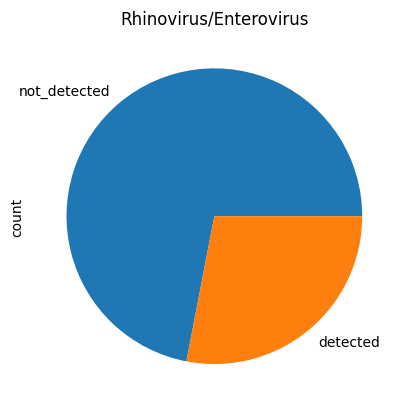

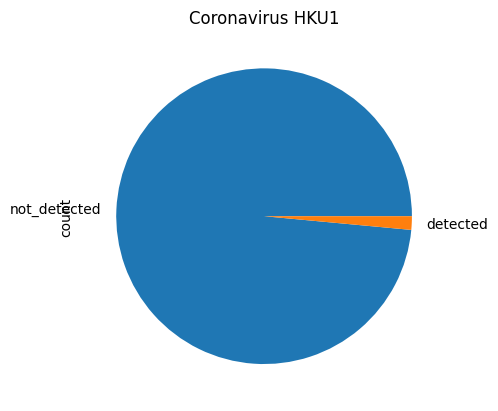

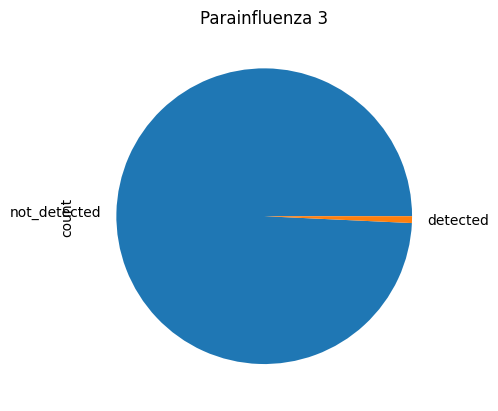

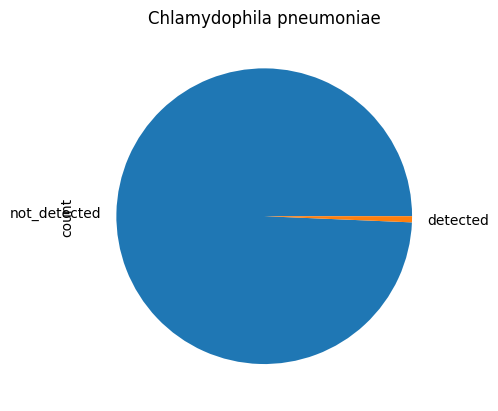

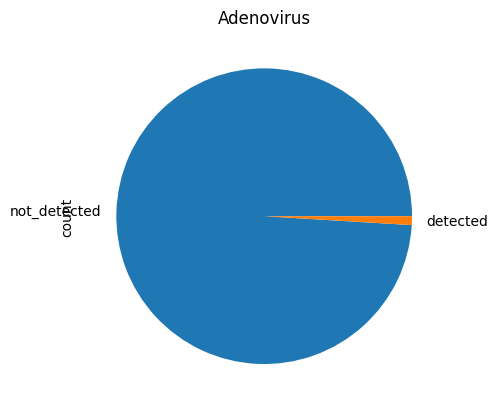

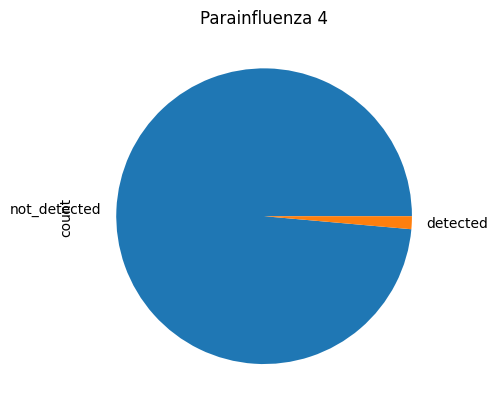

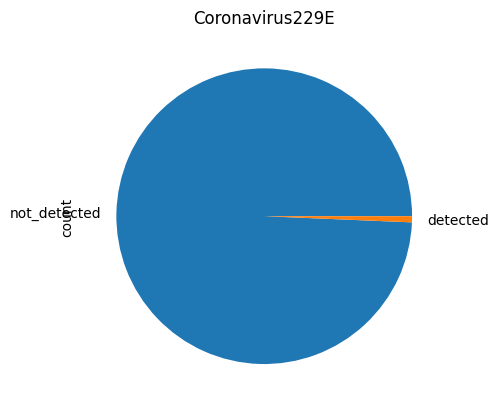

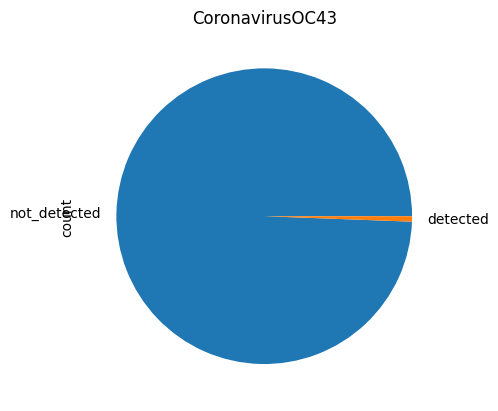

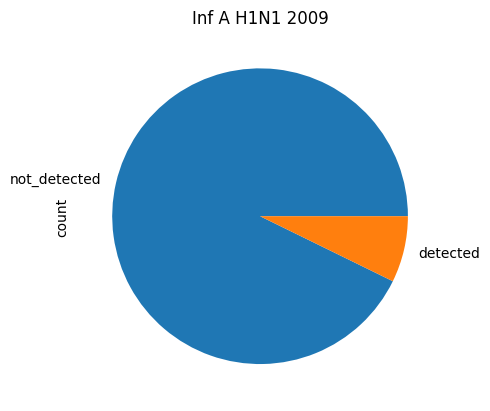

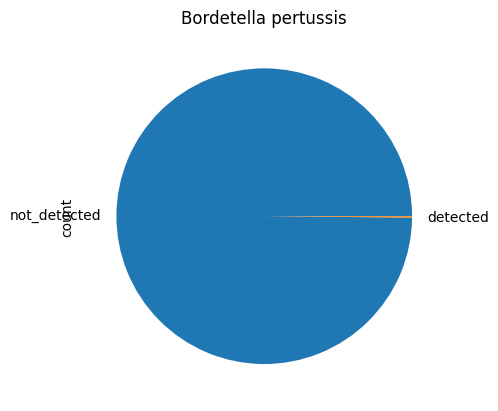

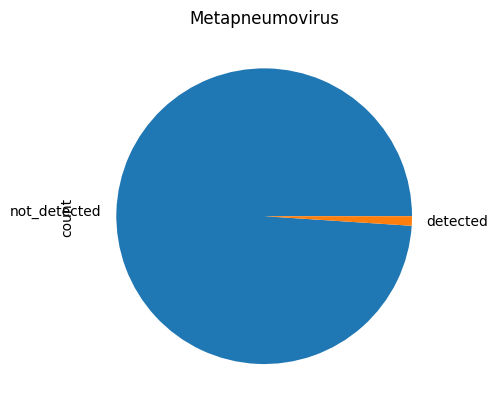

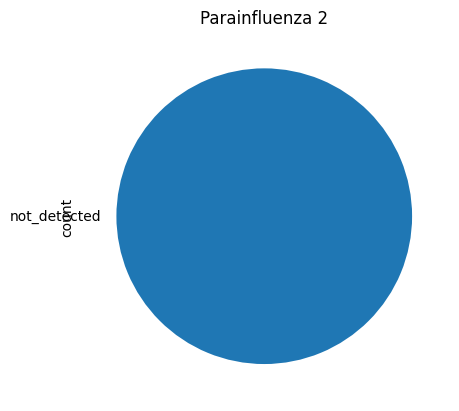

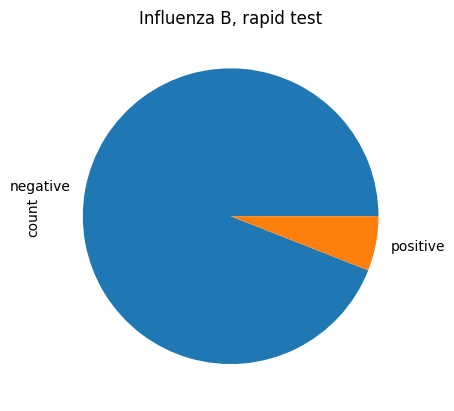

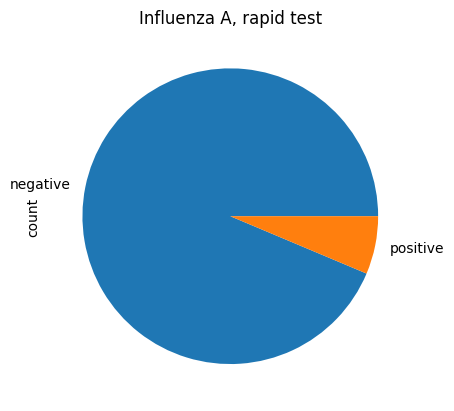

In [113]:
for col in df.select_dtypes("object"):
    plt.figure()
    df.value_counts(col).plot.pie()
    plt.title(col)

* Ai-je exploré les relations entre les features et la target ()?
    - 

**Tips**:
- ezfd

Création de sous ensembles positifs/négatifs et blood/viral

In [117]:
positive_df = df[df["SARS-Cov-2 exam result"] == "positive"]
negative_df = df[df["SARS-Cov-2 exam result"] == "negative"]
missing_rate = df.isna().sum() / df.shape[0]
blood_columns = df.columns[(missing_rate < 0.90) & (missing_rate > 0.89)]
viral_columns = df.columns[(missing_rate < 0.77) & (missing_rate > 0.76)]

print(f"blood_columns: {blood_columns.shape}")
print(f"viral_columns: {viral_columns.shape}")

blood_columns: (14,)
viral_columns: (17,)


Relations entre target/blood

ValueError: `bins` must increase monotonically, when an array

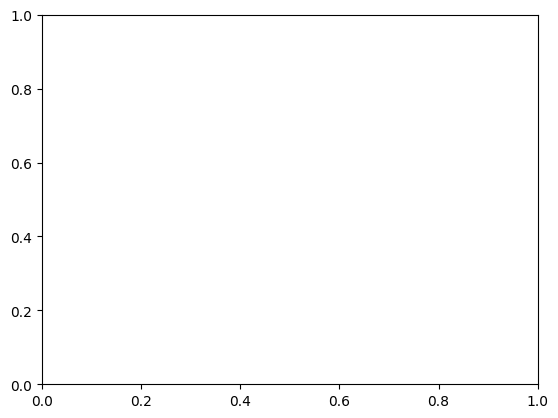

In [119]:
for col in df.columns:
    plt.figure()
    plt.hist(df[col], positive_df[col])

Relation entre target/viral